# SWMAL Exercise


##  Artificial Neural Networks as Universal Approximators

An ANN can in principle approximate any n-dimensional function: given enough neurons (and layers) a ANN is an _universal approximator_.

Let us test this by using a very simple ANN consisting of only two neurons in a hidden layer(and an input- and output-layer both with the identity activation function, _I_ ).

Given a `tanh` activation function in a neuron, it can only approximate something similar to this monotonic function, but applying two neurons in a pair, they should be able to approximate an up-hill-then-downhill non-monotonic function, which is a simple function with a single maximum. 

We use Scikit-learns `MLPRegressor` for this part of the exercise. Use the synthetic data, generated by the `GenerateSimpleData()` functions, in the next cells and train the MLP to make it fit the curve. 

Notice the lack of a train-test split in the exercise; since we only want to look at the approximation capabilities of the MLP, the train-test split is omitted, (and you are welcome to do the split yourself, and also to add noise in the data generators.)

OK


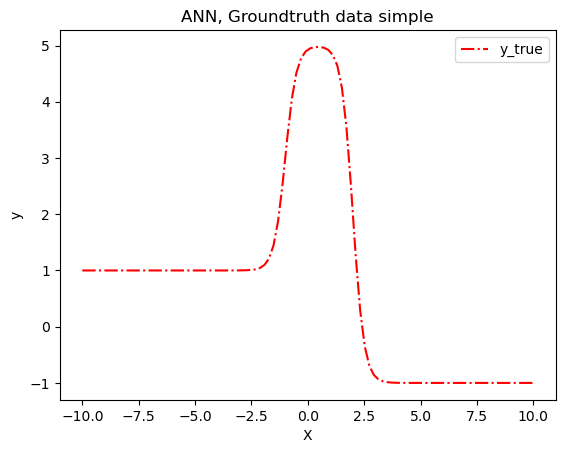

In [300]:
# One data generator just to test out the MLP..
#   An MLP with just two neurons should be able to approximate this simple
#   down-up graph using its two non-linear sigmoid or tanh neurons...

import matplotlib.pyplot as plt
import numpy as np

def GenerateSimpleData():
    X = np.linspace(-10, 10, 100)
    y = 2*np.tanh(2*X - 12) - 3*np.tanh(2*X - 4)  
    y = 2*np.tanh(2*X + 2)  - 3*np.tanh(2*X - 4)   
    X = X.reshape(-1, 1) # Scikit-algorithms needs matrix in (:,1)-format
    return X,y

X, y_true = GenerateSimpleData()
plt.plot(X, y_true, "r-.")
plt.legend(["y_true"])
plt.xlabel("X")
plt.ylabel("y")
plt.title("ANN, Groundtruth data simple")
           
print("OK")

#### Qa)

Fit the model using the data generator and the MLP in the next cell. 

Then plot `y_true` and `y_pred` in a graph, and extract the network weights and bias coefficients (remember the `coefs_` and `intercepts_` attributes you found on a linear regressor in an earlier exercise, the MLP is similar).

In [301]:
# Create MLP and fit model, just run..

from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(activation = 'tanh',      # activation function 
                   hidden_layer_sizes = [2], # layes and neurons in layers: one hidden layer with two neurons
                   alpha = 1e-5,             # regularization parameter
                   solver = 'lbfgs',         # quasi-Newton solver
                   max_iter=10000,
                   verbose = True)

mlp.fit(X, y_true)
y_pred = mlp.predict(X)

print("OK")

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.38974D+00    |proj g|=  3.46838D-01

At iterate    1    f=  1.16072D+00    |proj g|=  6.78632D-01

At iterate    2    f=  8.94381D-01    |proj g|=  5.55347D-01

At iterate    3    f=  5.36313D-01    |proj g|=  1.11606D+00

At iterate    4    f=  2.74963D-01    |proj g|=  4.70200D-01

At iterate    5    f=  1.47393D-01    |proj g|=  3.38681D-01

At iterate    6    f=  2.27430D-02    |proj g|=  1.96488D-01

At iterate    7    f=  1.20872D-02    |proj g|=  1.00995D-01

At iterate    8    f=  8.74470D-03    |proj g|=  1.54738D-02

At iterate    9    f=  8.28265D-03    |proj g|=  1.50579D-02

At iterate   10    f=  8.01928D-03    |proj g|=  1.56327D-02

At iterate   11    f=  7.51903D-03    |proj g|=  9.47223D-03

At iterate   12    f=  6.84719D-03    |proj g|=  1.72752D-02

At iterate   13    f=  5.8

 This problem is unconstrained.


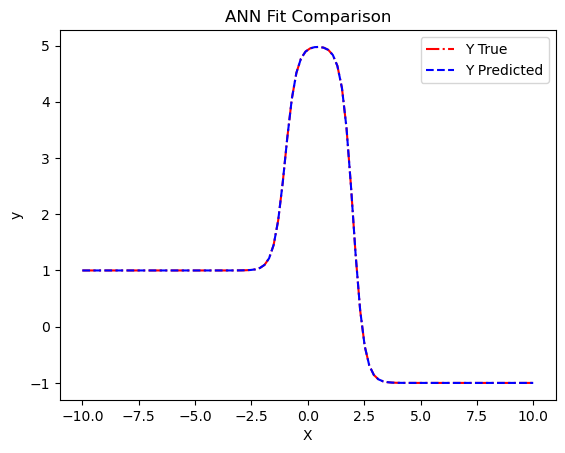

Weights:  [array([[2.00000557, 1.9998879 ]]), array([[-2.99984367],
       [ 1.99986499]])]
Biases:  [array([-4.00008728,  2.00003088]), array([2.357496e-05])]


In [302]:
# TODO: plot the fit..
plt.plot(X, y_true, "r-.", label="Y True")
plt.plot(X, y_pred, "b--", label="Y Predicted")
plt.legend()
plt.xlabel("X")
plt.ylabel("y")
plt.title("ANN Fit Comparison")
plt.show()

coefficients = mlp.coefs_
intercepts = mlp.intercepts_

print("Weights: ", coefficients)
print("Biases: ", intercepts)



#### Qb)

Draw the ANN with its input-, hidden- and output-layer. Remember the bias input to the input- and hidden-layer (a handmade drawing is fine).

Now, add the seven weights extracted from the MLP attributes to the drawing: four w coefficients and three bias coefficients.

In [303]:
# TODO: extract and print all coefficients..

#### Qc)

Create a mathematical formula for the network ala

    y_math = 0.3* tanh(2 * x + 0.1) - 0.3 * tanh(5 * x + 3) + 0.9

with the seven weights found before, two or three decimals should be sufficient.

In [304]:
# TODO: create formula..

#Weights:  [array([[-2.00004836,  2.00002538]]), array([[2.99999201],
#      [1.99999489]])]
#Biases:  [array([4.0000967, 2.0000356]), array([-1.94535102e-06])]

# The formula was derived by analyzing the weights and biases from the MLP:
# Weights: [array([[-2.00004836,  2.00002538]]), array([[2.99999201], [1.99999489]])]
# Biases: [array([4.0000967, 2.0000356]), array([-1.94535102e-06])]

# The network has:
# - 1 input neuron
# - 2 hidden neurons with tanh activation
# - 1 output neuron

# The formula follows the pattern:
# y_math = w2_1 * tanh(w1_1 * x + b1_1) + w2_2 * tanh(w1_2 * x + b1_2) + b2

# Where:
# w1_1 = -2.00 (first hidden neuron input weight)
# w1_2 = 2.00 (second hidden neuron input weight)
# b1_1 = 4.00 (first hidden neuron bias)
# b1_2 = 2.00 (second hidden neuron bias)
# w2_1 = 2.999 (first hidden to output weight)
# w2_2 = 1.999 (second hidden to output weight)
# b2 = -0.00 (output neuron bias)

w1_1 = coefficients[0][0][0]
w1_2 = coefficients[0][0][1]
b1_1 = intercepts[0][0]
b1_2 = intercepts[0][1]
w2_1 = coefficients[1][0][0]
w2_2 = coefficients[1][1][0]
b2 = intercepts[1][0]


#y_math = 2.000 * np.tanh(-2.00 * X + 4.00) + 1.99 * np.tanh(2.00 * X + 2.00) - 0.00
y_math = b2 + w2_1 * np.tanh(w1_1 * X + b1_1) + w2_2 * np.tanh(w1_2 * X + b1_2)


#### Qd)

Plot the `y_math` function using `np.tanh` and `X` as input similar to  

    y_math = 0.3*np.tanh(2 * X + ..
   
and compare `y_math` with `y_pred` and `y_true` in the graph.

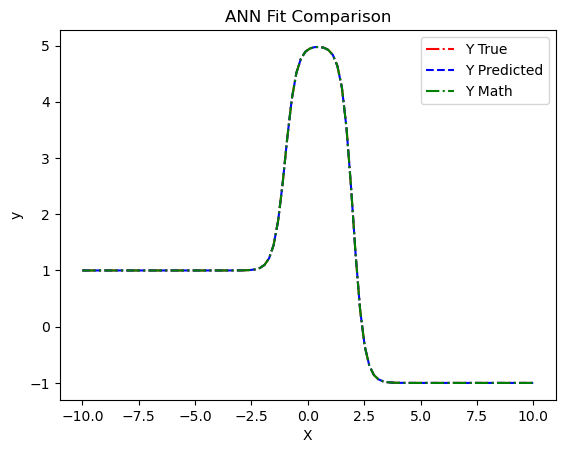

OK


In [305]:
# TODO: plot the formula..

plt.plot(X, y_true, "r-.", label="Y True")
plt.plot(X, y_pred, "b--", label="Y Predicted")
plt.plot(X, y_math, "g-.", label="Y Math")
plt.legend()
plt.xlabel("X")
plt.ylabel("y")
plt.title("ANN Fit Comparison")
plt.show()
print("OK")


#### Qe)

Plot the first half of the function ala

    y_math_first_part = 0.3* tanh(2 * X + 0.1)
   
and then plot the second part. The sum of these two parts gives the total value of y_math if you also add them with the last bias part.

Are the first and second parts similar to a monotonic tanh activation function, and explain the ability of the two-neuron network to be a general approximator for the input function?

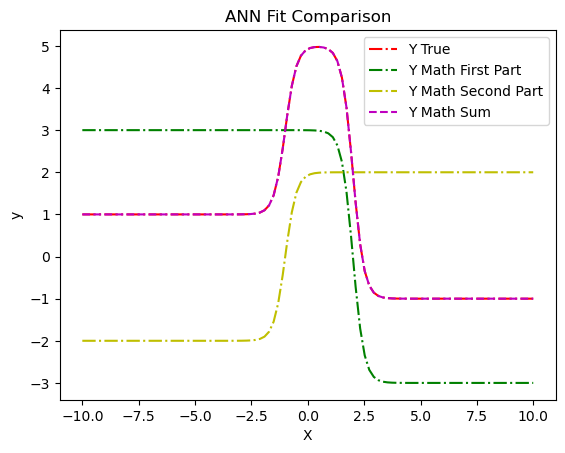

OK


In [306]:
# TODO: plot the first and second half of the formula..
y_math_first_part = w2_1 * np.tanh(w1_1 * X + b1_1)
y_math_second_part = w2_2 * np.tanh(w1_2 * X + b1_2)

#add the two parts together
y_math = y_math_first_part + y_math_second_part

plt.plot(X, y_true, "r-.", label="Y True")
plt.plot(X, y_math_first_part, "g-.", label="Y Math First Part")
plt.plot(X, y_math_second_part, "y-.", label="Y Math Second Part")
plt.plot(X, y_math, "m--", label="Y Math Sum")
plt.legend()
plt.xlabel("X")
plt.ylabel("y")
plt.title("ANN Fit Comparison")
plt.show()
print("OK")



#### Qf)

Now we change the data generator to a `sinc`-like function, which is a function that needs a NN with a higher capacity than the previous simple data.

Extend the MLP with more neurons and more layers, and plot the result. Can you create a good approximation for the `sinc` function?

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.89708D-01    |proj g|=  4.96531D-01

At iterate    1    f=  6.59423D-02    |proj g|=  5.88457D-02

At iterate    2    f=  6.56237D-02    |proj g|=  4.55807D-02

At iterate    3    f=  6.53603D-02    |proj g|=  1.31413D-02

At iterate    4    f=  6.53089D-02    |proj g|=  1.09251D-02

At iterate    5    f=  6.49116D-02    |proj g|=  2.34679D-02

At iterate    6    f=  6.47390D-02    |proj g|=  1.44871D-02

At iterate    7    f=  6.46978D-02    |proj g|=  1.55762D-03

At iterate    8    f=  6.46971D-02    |proj g|=  2.60403D-04

At iterate    9    f=  6.46971D-02    |proj g|=  9.62324D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.


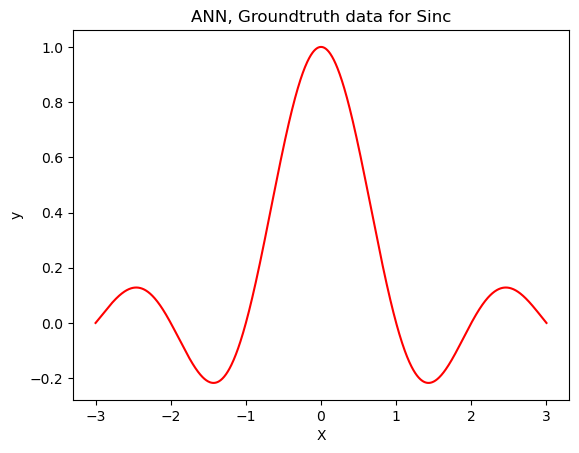

In [ ]:
def GenerateSincData():
    # A Sinc curve, approximation needs more neurons to capture the 'ringing'...
    X = np.linspace(-3, 3, 1000) 
    y = np.sinc(X)
    X = X.reshape(-1,1)
    return X, y

X, y_true = GenerateSincData()
plt.plot(X, y_true, "r-")
plt.xlabel("X")
plt.ylabel("y")
plt.title("ANN, Groundtruth data for Sinc")

# TODO:


#assert False, "TODO: instantiate and train an MLP on the sinc data.."
mlp_layer_5 = MLPRegressor(activation = 'tanh',      
                   hidden_layer_sizes = [2][3][5][3][2], 
                   alpha = 1e-5,             
                   solver = 'lbfgs',        
                   max_iter=10000,
                   verbose = True)

mlp_layer_10 = MLPRegressor(activation = 'tanh',
                                   hidden_layer_sizes=[2][3][5][3][2][3][5][3][2],
                                   alpha=1e-5,
                                   solver='lbfgs',
                                   max_iter=10000,
                                    verbose=True)



####  [OPTIONAL] Qg) 

Change the hyperparameters in the MLP, say the `alpha` to `1e5` and `1e-1`, and explain the results (hint: regularization).

Also, try out different `activation` functions `learning_rate`s and `solver`s, or other interesting hyperparameters found on the MLP regressor in the documentation.

Finally, implement the MLP regressor in `Keras` instead.

(Solvers aka. optimizers and regularization will be discussed in a later lecture.)

In [308]:
# TODO: do some experiments..

REVISIONS||
:- | :- |
2021-10-04| CEF, initial, converted from old word format.
2021-10-04| CEF, inserted ANN_example.py into Notebook.
2023-03-06| CEF, minor table update.
2023-03-09| CEF, major update, translated to English, elaborated on NNs as Universal Approximator.